In [138]:
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.cluster import AgglomerativeClustering


# Euclidean distance

In [139]:
# initializing points in
# numpy arrays
p_1 = np.array([1, 2, 3])
p_2 = np.array([1, 1, 1])

# subtraction vectors
temp = p_1 - p_2

# dot product to find the sum of the squares 
# reminder the dot product multiplies every element of an array for the corrsponding element of another array and sums the products

sum_sq = np.dot(temp,temp)


dist = np.sqrt(sum_sq)


print(dist)

2.23606797749979


We can also define a function that does that for us really quickly

In [140]:
def e_dist(vector1, vector2):
    diff = vector1 - vector2
    return np.sqrt(np.dot(diff,diff))

e_dist(p_1, p_1)


0.0

# Cluster types

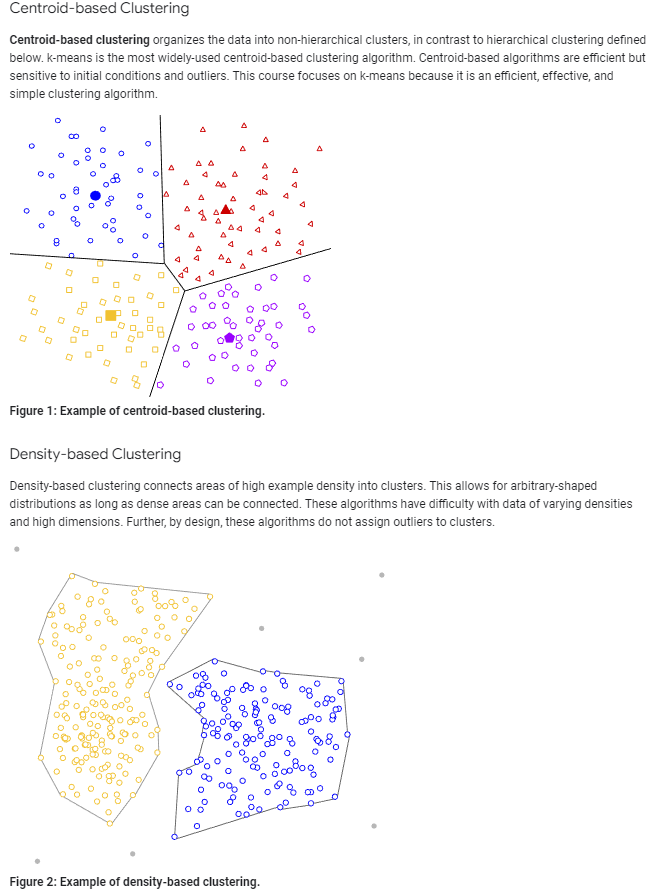

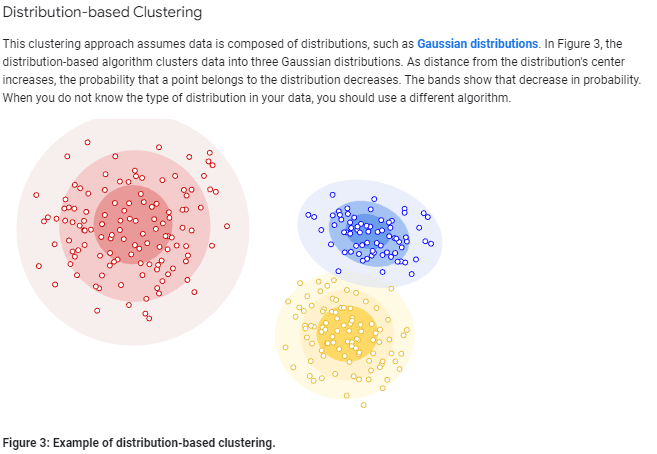

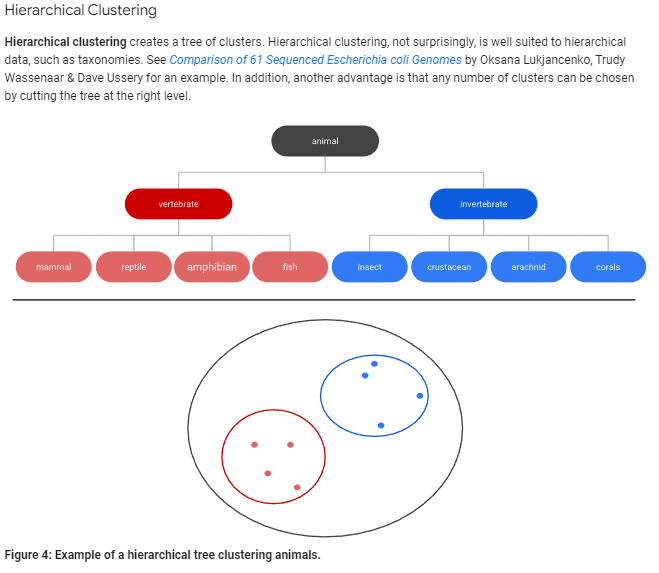

# Agglomerative CLustering

https://www.youtube.com/watch?v=7xHsRkOdVwo


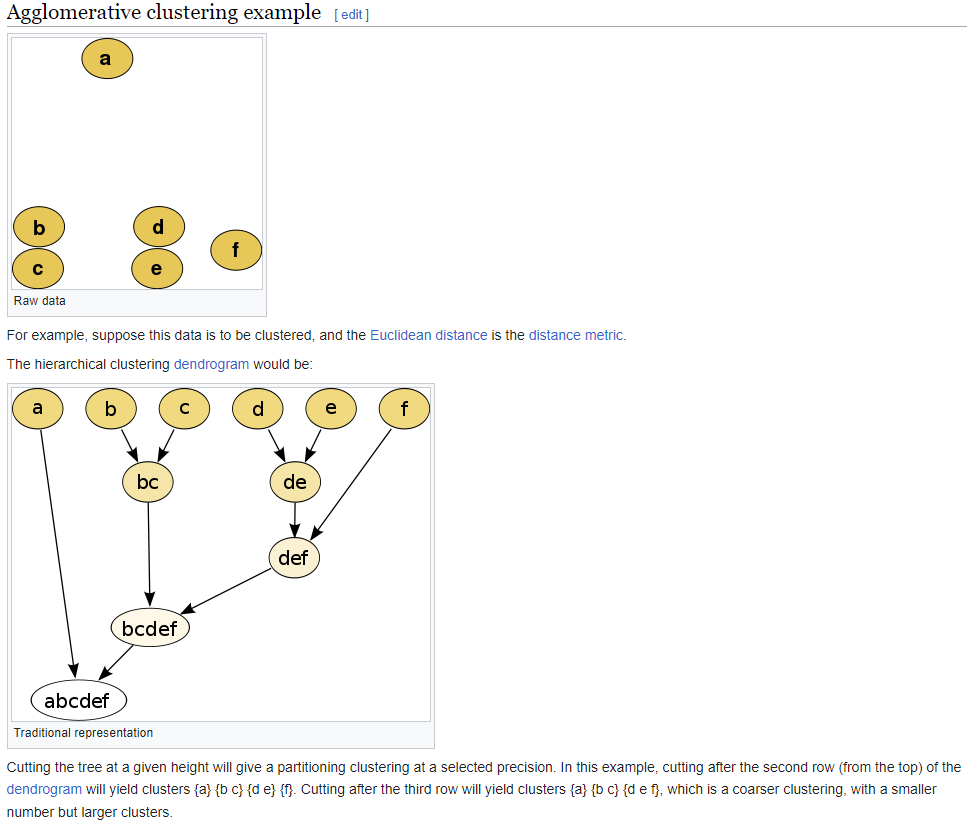

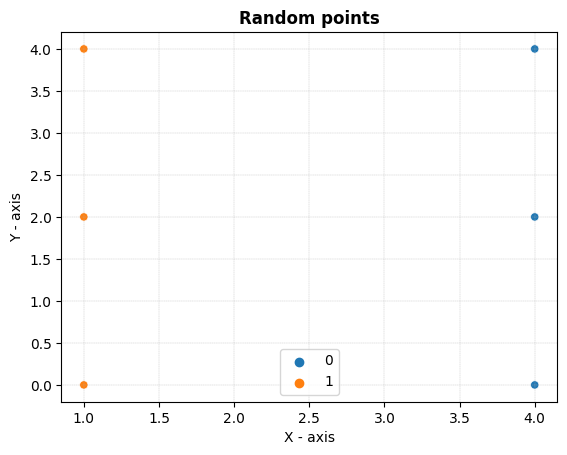

In [141]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

# the syntax give that aou array is a matrix 2x6 means that we are taking first all the x values for the 0 column and than all the x values for the 1 column


# we us an in-build function to cluster the values
clustering = AgglomerativeClustering().fit(X)

# This give the values of the labels of our points
clustering.labels_

# We can tha nuse a scatter plot with that "hue " to see the results
sns.scatterplot(x = X[:,0], y = X[:,1], hue = clustering.labels_)
plt.title('Random points', fontsize = 12, fontweight = 'bold')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.grid(linestyle = '--', linewidth = 0.25)

# plt.scatter(x = X[:,0], y = X[:,1], c = clustering.labels_, cmap = 'coolwarm')


In [142]:
# We can check the label value for each of our points
clustering.labels_

array([1, 1, 1, 0, 0, 0], dtype=int64)

In [143]:
# We can check the number of cluster 
clustering.n_clusters


2

# K-Means Clustering

https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages

$f(\theta) = \sum_{i=1}^N \sum_{i=1}^K A_{nk}|| \theta_k - x_n||^2$ 

$\theta_k = \text{centroid of the }k^{th} \text{ cluster}$

$A_{nk} = 1\text{ when the } n^{th} \text{ point is assigned to the } n^{th} \text {cluster}$

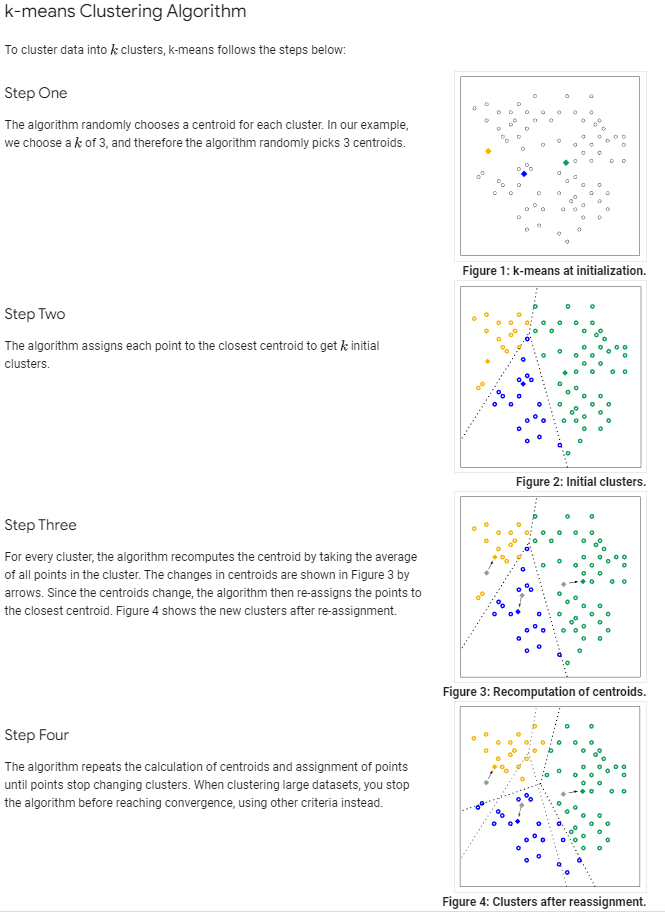

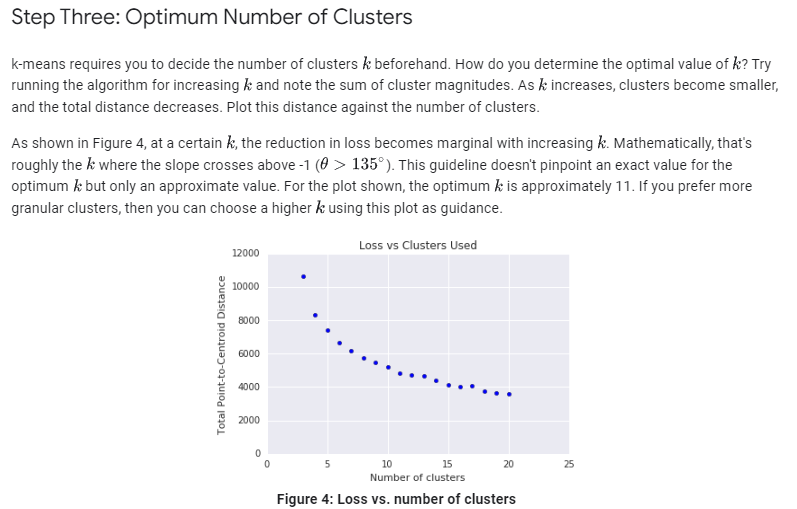

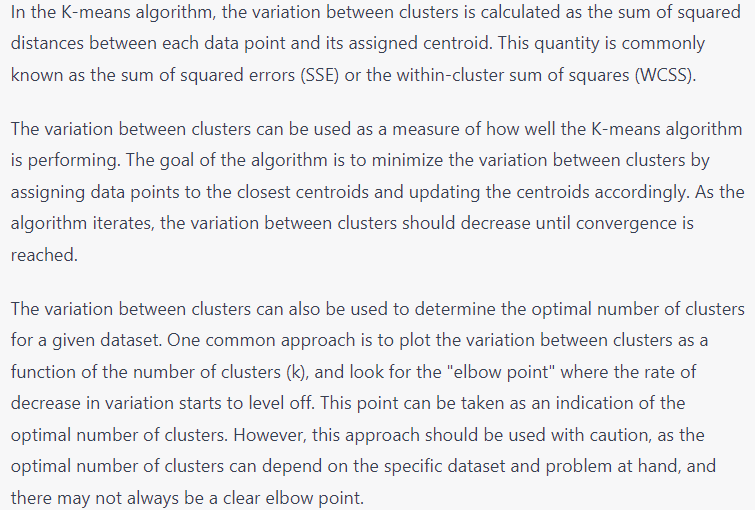




In [144]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

The sklearn site with the description of the function:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

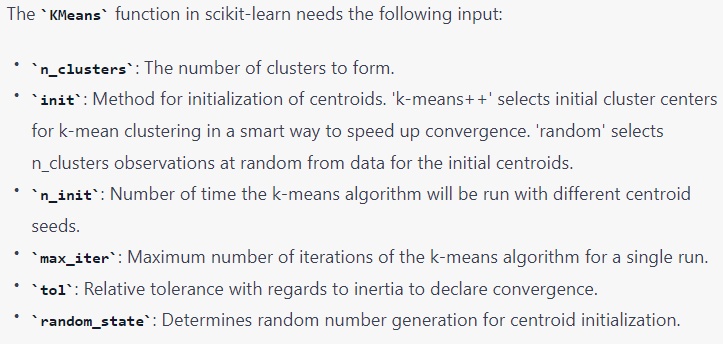

In [145]:
# sSo we are appling kmenas to cluster our data at the moment, lets see how it will look like
kmeans = KMeans(n_clusters=2, random_state= 0, n_init= 'auto').fit(X)

In [146]:
# As for the Clusterin.labels we can show the labels, as we can see they differ from our previus labesl
kmeans.labels_

array([1, 0, 1, 0, 0, 1])

In [147]:
# WE GAVE HIM TWO POINTS AND HE GIVES US A PREDICTION FOR THE LABELS OF THE TWO POINTS
kmeans.predict([[0, 0], [12,2]])

array([1, 0])

In [148]:
# It gives us the centroid of the clusters, can be useful , let's say we actually want to calculate the centroid for example
kmeans.cluster_centers_

array([[3.        , 3.33333333],
       [2.        , 0.66666667]])

Let's see the result of K-means compared to the agglomerative clusteringfrom before


We have a very different result, it is not very intuitive what we are getting to be honest i would not like this result


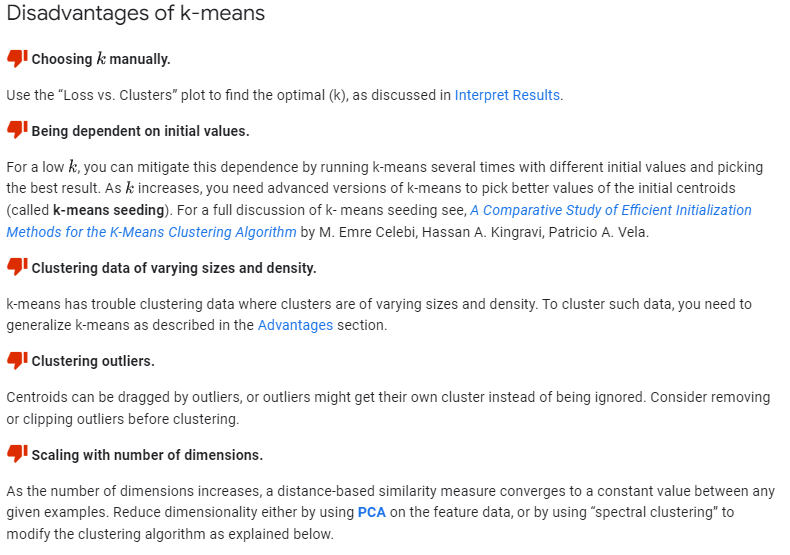

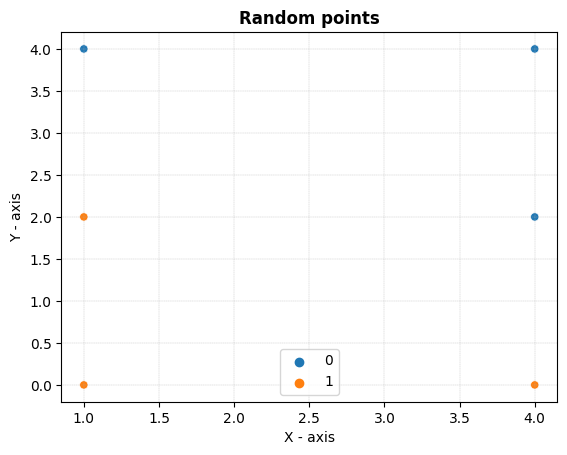

In [149]:
# We can tha nuse a scatter plot with that "hue " to see the results
sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmeans.labels_)
plt.title('Random points', fontsize = 12, fontweight = 'bold')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.grid(linestyle = '--', linewidth = 0.25)

# this is mainly because we are using the centroids and we are not actually comparing the point the other points but rather the point to their average (the centroids)
# On the other hand this algoritm is very quick

In [150]:
import random 

[[ 1.32890209  0.40840289]
 [ 0.11709908  1.1224659 ]
 [-0.48816511  0.9372222 ]
 ...
 [ 0.92689229  0.5534094 ]
 [-1.03675553  1.78935848]
 [-1.60726698  1.40250517]]


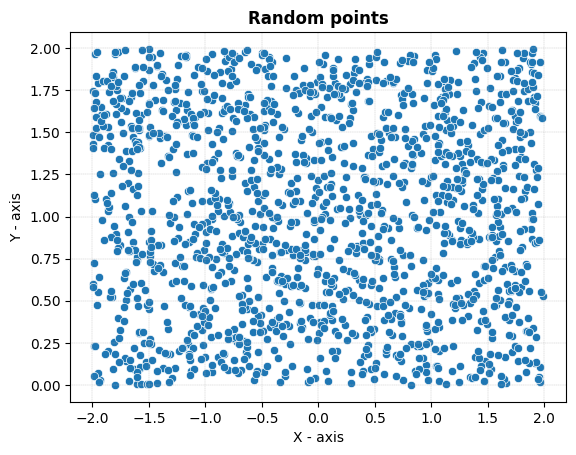

In [151]:

num_points = 1500

x_p = np.random.uniform(low = -2, high= 2, size= num_points)
y_p = np.random.uniform(low = 0, high= 2, size= num_points)

Y = np.column_stack((x_p, y_p))
sns.scatterplot(x = x_p,y =  y_p)
plt.title('Random points', fontsize = 12, fontweight = 'bold')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.grid(linestyle = '--', linewidth = 0.25)

print(Y)

In [152]:
kmeans_y = KMeans(n_clusters=4, random_state= 0, n_init= 'auto').fit(Y)

In [153]:
kmeans_y.labels_

array([0, 2, 2, ..., 0, 3, 3])

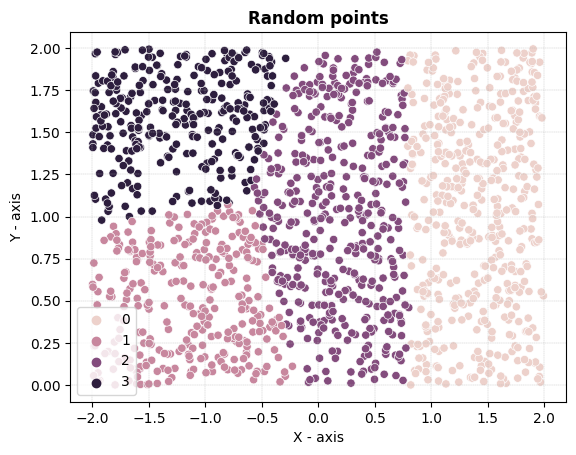

In [154]:
sns.scatterplot(x = x_p,y =  y_p, hue= kmeans_y.labels_)
plt.title('Random points', fontsize = 12, fontweight = 'bold')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.grid(linestyle = '--', linewidth = 0.25)

# TIPS EXAMPLES

In [155]:
# import pandas as pd

df = pl.read_csv(r'https://media.githubusercontent.com/media/jakub-braja/Podstawy-uczenia-maszynowego/main/DataSets/tips.csv',  separator= ',')

df.head(10)

index_of_row,total_bill,tip,sex,smoker,day,time,size
i64,f64,f64,str,str,str,str,i64
0,16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2
1,10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3
2,21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3
3,23.68,3.31,"""Male""","""No""","""Sun""","""Dinner""",2
4,24.59,3.61,"""Female""","""No""","""Sun""","""Dinner""",4
5,25.29,4.71,"""Male""","""No""","""Sun""","""Dinner""",4
6,8.77,2.0,"""Male""","""No""","""Sun""","""Dinner""",2
7,26.88,3.12,"""Male""","""No""","""Sun""","""Dinner""",4
8,15.04,1.96,"""Male""","""No""","""Sun""","""Dinner""",2


<AxesSubplot: xlabel='total_bill', ylabel='tip'>

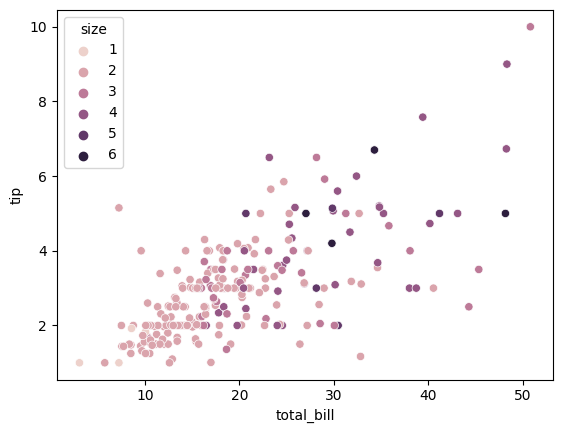

In [156]:
sns.scatterplot(x= df['total_bill'], y= df['tip'], hue= df['size'])

We converted our dataframe to a numpy array as it is faster and easyly managable

In [157]:
Z = df[['tip', 'total_bill']].to_numpy()

# Agglomerative Clustering & Kmeans Examples

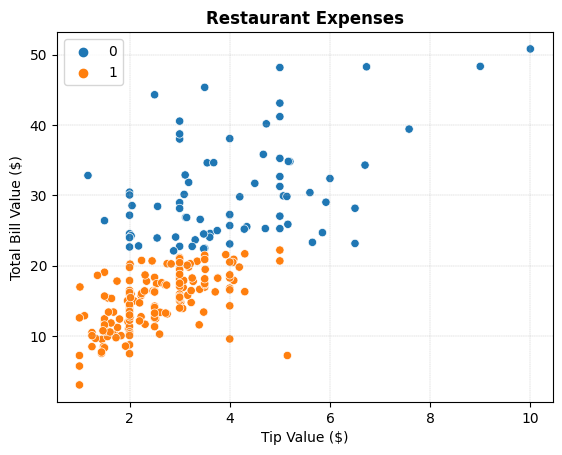

In [158]:
# Agglomerative clustering perfomed very well in the case of the 46 points example before but now it seems to suck quite a lot 

clustering = AgglomerativeClustering().fit(Z)
sns.scatterplot(x=df['tip'], y=df['total_bill'], hue=clustering.labels_)
plt.title('Restaurant Expenses', fontsize = 12, fontweight = 'bold')
plt.xlabel('Tip Value ($)')
plt.ylabel('Total Bill Value ($)')
plt.grid(linestyle = '--', linewidth = 0.25)

In [159]:
clustering.labels_
print(f"Total number = {len(clustering.labels_)}\n1 = {sum(clustering.labels_)}\n0 = {len(clustering.labels_) - sum(clustering.labels_)}")


Total number = 244
1 = 168
0 = 76


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

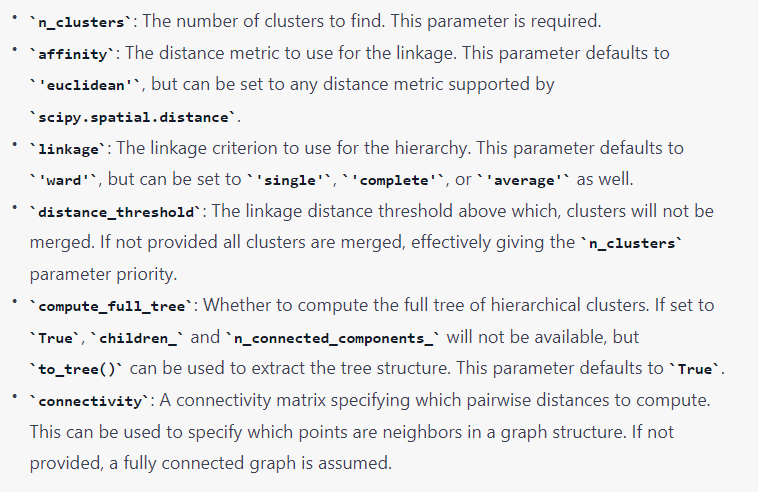

# Data Standarization 

Standard Scalar

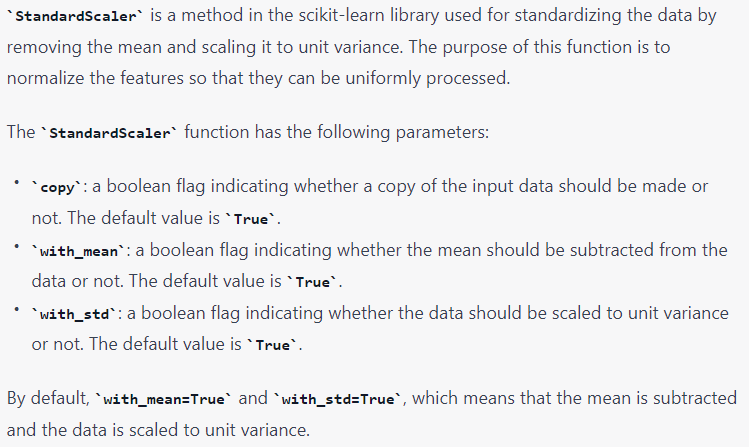

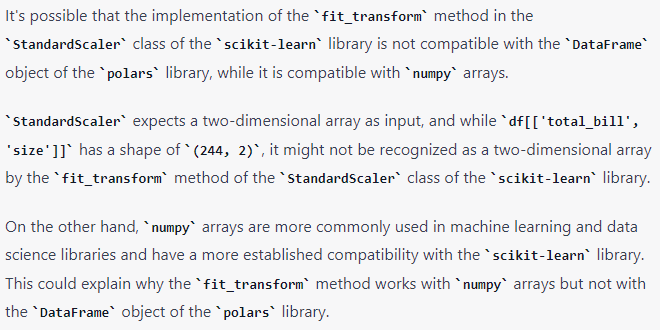

In [160]:
from sklearn.preprocessing import StandardScaler
import pandas as pd



# create an instance of the StandardScaler class
scaler = StandardScaler()
# df_np = df[['total_bill', 'size']].to_numpy()
# standardize the 'total_bill' and 'size' columns
df[['total_bill', 'size']] = scaler.fit_transform(df[['total_bill', 'size']].to_numpy())



np.shape(df[['total_bill', 'size']])




(244, 2)

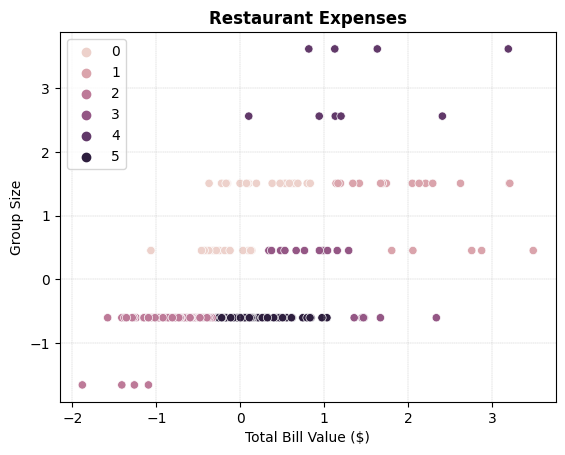

In [161]:
Q = df[['total_bill', 'size']].to_numpy()

clustering_Q = AgglomerativeClustering(n_clusters=6).fit(Q)


sns.scatterplot(x=df['total_bill'], y=df['size'], hue=clustering_Q.labels_)
plt.title('Restaurant Expenses', fontsize = 12, fontweight = 'bold')
plt.xlabel('Total Bill Value ($)')
plt.ylabel('Group Size')
plt.grid(linestyle = '--', linewidth = 0.25)

In [162]:
from sklearn.cluster import SpectralClustering

# Spectral Clustering
The parameters used for spectral clustering 

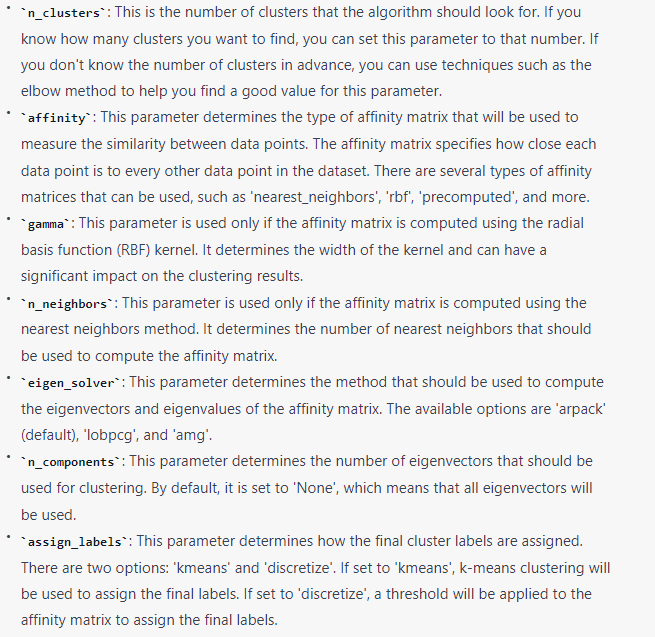

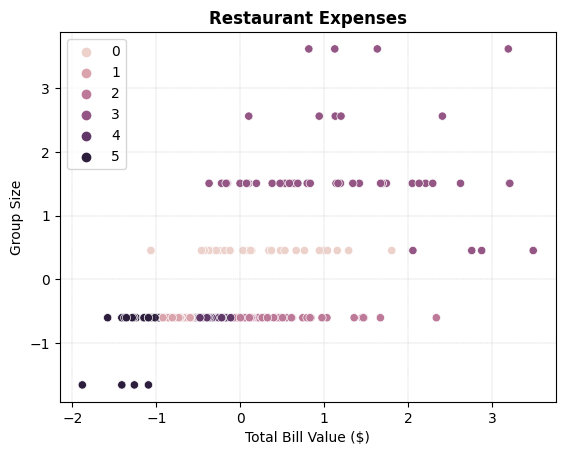

In [163]:
R = df[['total_bill', 'size']].to_numpy()

clustering_R = SpectralClustering(n_clusters=6, affinity='nearest_neighbors').fit(R)


sns.scatterplot(x=df['total_bill'], y=df['size'], hue=clustering_R.labels_)
plt.title('Restaurant Expenses', fontsize = 12, fontweight = 'bold')
plt.xlabel('Total Bill Value ($)')
plt.ylabel('Group Size')
plt.grid(linestyle = '--', linewidth = 0.25)

# DBSCAN
Clustering example 

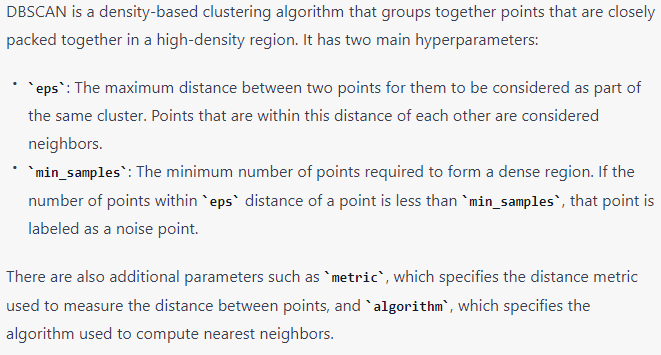

https://www.youtube.com/watch?v=RDZUdRSDOok

In [164]:
from sklearn.cluster import DBSCAN

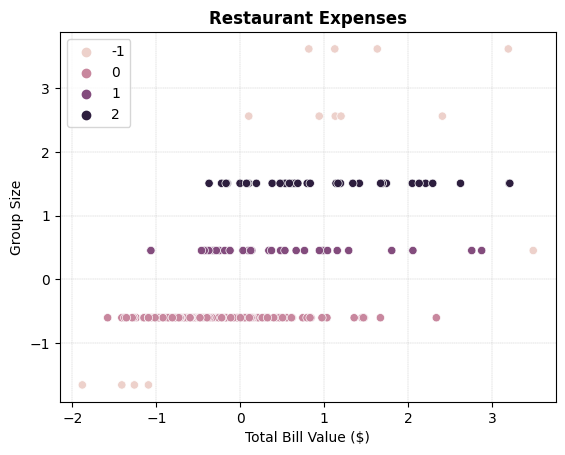

In [165]:
S = df[['total_bill', 'size']].to_numpy()

# we are assiggning 0,95 as a max distance between two cluster points

clustering_S = DBSCAN(0.95).fit(S)


sns.scatterplot(x=df['total_bill'], y=df['size'], hue=clustering_S.labels_)
plt.title('Restaurant Expenses', fontsize = 12, fontweight = 'bold')
plt.xlabel('Total Bill Value ($)')
plt.ylabel('Group Size')
plt.grid(linestyle = '--', linewidth = 0.25)

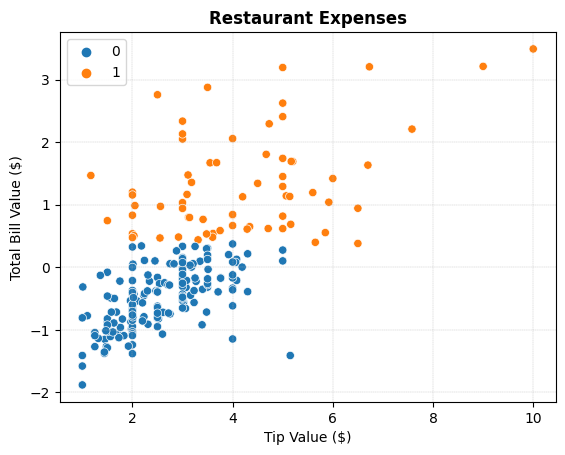

In [166]:
# This time KMEANS performed as well as agglomerative clustering

kmeans_df = KMeans(n_clusters=2, n_init='auto', random_state=0).fit(Z)
sns.scatterplot(x=df['tip'], y=df['total_bill'], hue= kmeans_df.labels_)
plt.title('Restaurant Expenses', fontsize = 12, fontweight = 'bold')
plt.xlabel('Tip Value ($)')
plt.ylabel('Total Bill Value ($)')
plt.grid(linestyle = '--', linewidth = 0.25)

In [167]:
kmeans_df.labels_
print(f"Total number = {len(kmeans_df.labels_)}\n1 = {sum(kmeans_df.labels_)}\n0 = {len(kmeans_df.labels_) - sum(kmeans_df.labels_)}")

Total number = 244
1 = 68
0 = 176


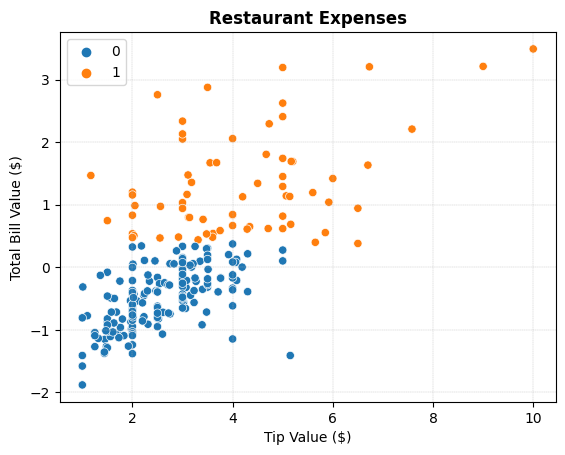

In [168]:
# Using KMeans it is very easy to adjust the number of cluster to our scope

kmeans_df_6 = KMeans(n_clusters=6, n_init='auto', random_state=0).fit(Z)
sns.scatterplot(x=df['tip'], y=df['total_bill'], hue= kmeans_df.labels_)
plt.title('Restaurant Expenses', fontsize = 12, fontweight = 'bold')
plt.xlabel('Tip Value ($)')
plt.ylabel('Total Bill Value ($)')
plt.grid(linestyle = '--', linewidth = 0.25)

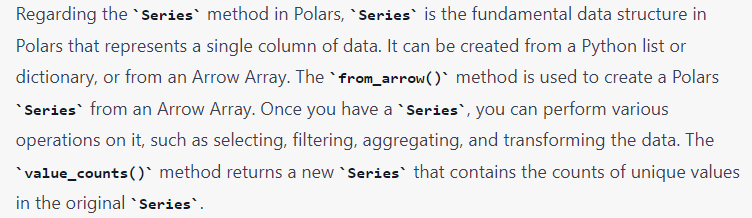

In [169]:
# let's say i want to count how many point do i have in each label

labels = pl.Series(kmeans_df_6.labels_)  # Convert kmeans_df_6.labels_ to a Polars Series
counts = labels.value_counts()  # Get the counts for each label
print(counts)

shape: (6, 2)
┌─────┬────────┐
│     ┆ counts │
│ --- ┆ ---    │
│ i32 ┆ u32    │
╞═════╪════════╡
│ 5   ┆ 28     │
│ 4   ┆ 62     │
│ 1   ┆ 40     │
│ 0   ┆ 37     │
│ 2   ┆ 12     │
│ 3   ┆ 65     │
└─────┴────────┘


# TITANIC Dataset

In [170]:
titanic = pl.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head(50)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Ow...","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. ...","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Mis...","""female""",26.0,0,0,"""STON/O2. 31012...",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs....","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. Wil...","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""
6,0,3,"""Moran, Mr. Jam...","""male""",null,0,0,"""330877""",8.4583,null,"""Q"""
7,0,1,"""McCarthy, Mr. ...","""male""",54.0,0,0,"""17463""",51.8625,"""E46""","""S"""
8,0,3,"""Palsson, Maste...","""male""",2.0,3,1,"""349909""",21.075,null,"""S"""
9,1,3,"""Johnson, Mrs. ...","""female""",27.0,0,2,"""347742""",11.1333,null,"""S"""


We had to fill the null values in our dataset prior to proceding with the computation 

In [171]:
A = titanic[['Fare','Age']]
A = A.fill_null(0)

A = A.to_numpy()
y = titanic[['Survived']].to_numpy()

np.shape(y)

(891, 1)

We now perform the clustering 

In [172]:
clf = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(A)

Here we plot the actual data that we have from our Dataset

<AxesSubplot: xlabel='Age', ylabel='Fare'>

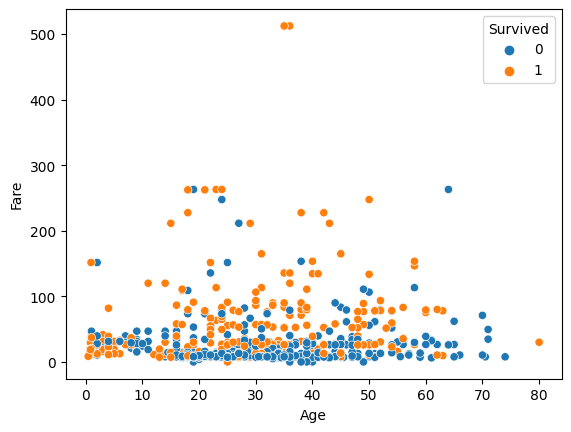

In [173]:
sns.scatterplot(x=titanic['Age'], y=titanic['Fare'], hue=titanic['Survived'])

Here we pot the clustered data into two labels, Survided 

<AxesSubplot: xlabel='Age', ylabel='Fare'>

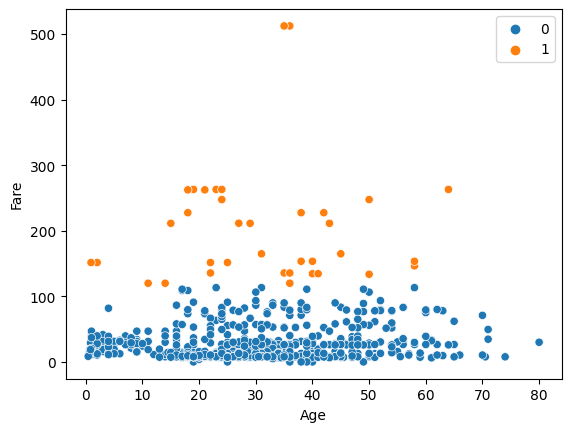

In [174]:
sns.scatterplot(x=titanic['Age'], y=titanic['Fare'], hue=clf.labels_)

In [175]:
clf.predict(A)
np.shape(clf.predict(A))

(891,)

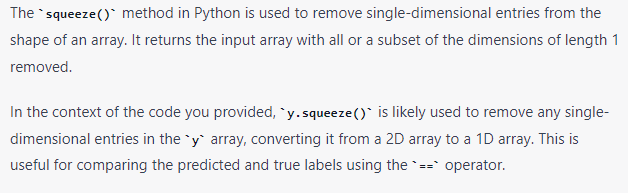

In [176]:
#ile się udało trafić klas, za pomocą indeksowania logicznego
correct = (clf.predict(A) == y.squeeze()).sum()  # we have to squeez as the shape of y is (891,1)

# We are printing the ratio of teh correct answers to the toa lnumber of passangers. The ratio is close to 60% which is close to 50% meaning randomness in a 2 possible state indipendendt events

print(correct/len(A))

0.6408529741863075


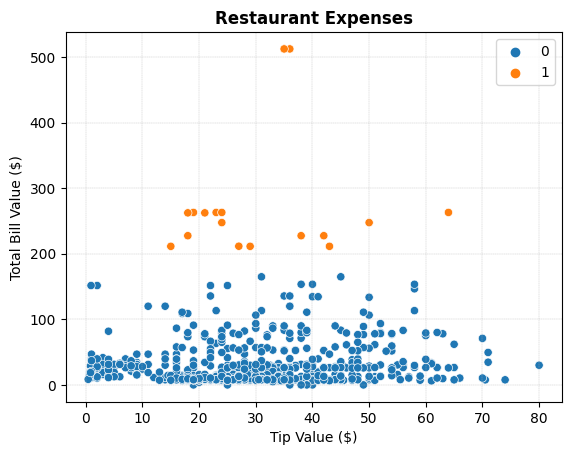

In [177]:
clustering_A = AgglomerativeClustering().fit(A)

sns.scatterplot(x=titanic['Age'], y=titanic['Fare'], hue= clustering_A.labels_)
plt.title('Restaurant Expenses', fontsize = 12, fontweight = 'bold')
plt.xlabel('Tip Value ($)')
plt.ylabel('Total Bill Value ($)')
plt.grid(linestyle = '--', linewidth = 0.25)

In [178]:
correct = (clustering_A.labels_ == y.squeeze()).sum()

# Calculate the accuracy ratio and print it
accuracy_ratio = correct / len(A)
print(accuracy_ratio)

0.6251402918069585


The inertia of a k-means solution is the sum of the squared distances between each data point and

its corresponding cluster center. 
In other words, it measures how far the data points are from their respective cluster centers.

Mathematically, the inertia of a k-means solution with k clusters can be defined as:

$J=\sum_{i=1}^{k}\sum_{x\in C_i}||x-\mu_i||^2$

where $C_i$ represents the i-th cluster, $\mu_i$ is the centroid of 

the i-th cluster, and $||x-\mu_i||^2$ represents the squared distance 

between a data point x and its corresponding centroid $\mu_i$.

The goal of k-means clustering is to minimize the inertia by finding the optimal cluster 
centers that can minimize the sum of the squared distances.

In [179]:
# import pandas as pd

df = pl.read_csv(r'https://media.githubusercontent.com/media/jakub-braja/Podstawy-uczenia-maszynowego/main/DataSets/tips.csv',  separator= ',')

B = df[['tip', 'total_bill']].to_numpy()


Adding a new column in polars is not that easy but it is feasible

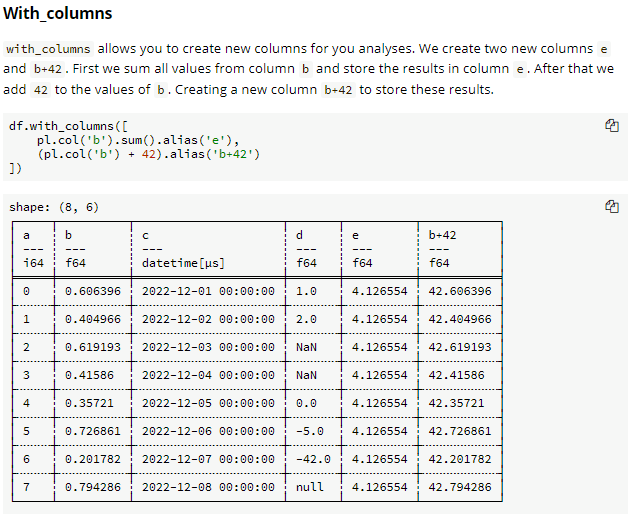

C:\Users\jakub\AppData\Local\Temp\ipykernel_18304\2130379389.py:9: DeprecationWarning: `columns` is deprecated as an argument to `__init__`; use `schema` instead.
  resG = pl.DataFrame(resG, columns=['n_clusters', 'K-Inertia'])


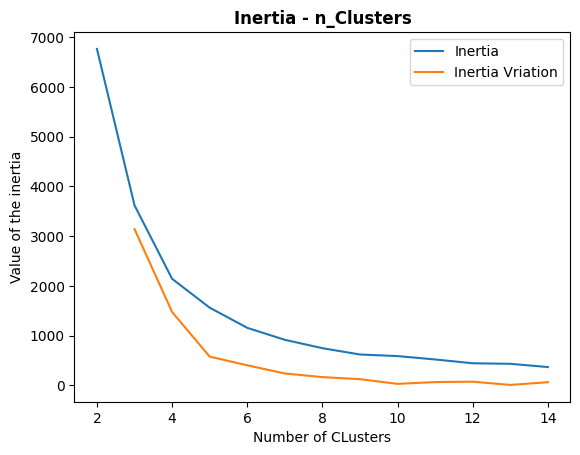

In [180]:
# kmB = KMeans(n_clusters=3, n_init='auto', random_state=0).fit(B)

resG = []
nc = 15
for n in range(2, nc):
    kmB = KMeans(n_clusters=n, n_init='auto').fit(B)
    resG.append([n, kmB.inertia_])

resG = pl.DataFrame(resG, columns=['n_clusters', 'K-Inertia'])

resG = resG.with_columns([
    (pl.col('K-Inertia') - pl.col('K-Inertia').shift(1)).abs().alias('Inertia Variation')
    ])


# LETS Prepare a figure with the results 

figure, ax = plt.subplots()

sns.lineplot(x=resG['n_clusters'], y=resG['K-Inertia'], ax=ax, label = 'Inertia')
sns.lineplot(x=resG['n_clusters'], y=resG['Inertia Variation'], ax=ax, label= 'Inertia Vriation')
plt.title('Inertia - n_Clusters', fontweight = 'bold')
plt.xlabel('Number of CLusters')
plt.ylabel('Value of the inertia')
plt.legend()

# plt.grid(linestyle = '--', linewidth = 0.25)

# ZADANIA 
## Zadanie 1.

*  W oparciu o wygenerowane dane tablicy numpy X1 przygotuj klastrowania  
za pomocą algorytmu K-Średnich i Algorytmu aglomeracyjnego. Zobacz jakie są różnice w tych 2 podejściach.

* W oparciu o wygenerowane dane tablicy numpy X2 przygotuj klastrowania  
za pomocą algorytmu K-Średnich i Algorytmu aglomeracyjnego. Zobacz jakie są różnice w tych 2 podejściach.



In [181]:
import polars as pl 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import cophenet
from sklearn.datasets import make_blobs, make_moons

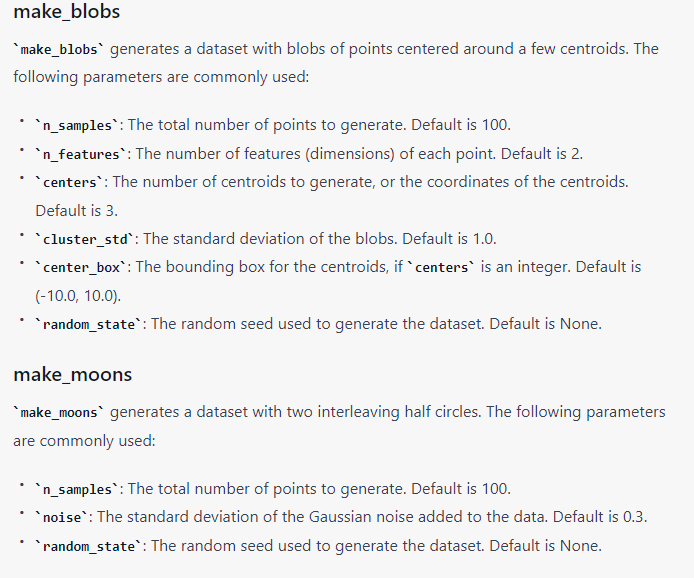

# BLOBS

In [182]:
# WE just generated a set of blobs that we are going to cluster. Make_blobs automatically generates the list  of points X1 ans a list of the cluster assignment y1

X1, y1 = make_blobs(n_samples=1000, centers=3, cluster_std=0.99)

df_X1 = pl.DataFrame(X1)
df_X1.head()


column_0,column_1
f64,f64
10.733322,4.050186
8.558488,6.249937
4.767648,-1.655944
8.804212,2.54653
3.751221,9.589285


<AxesSubplot: >

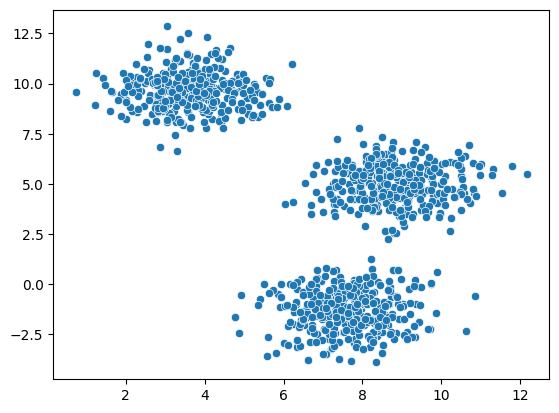

In [183]:
# let's plot the blobs to see how it will look like 

sns.scatterplot(x=X1[:,0], y=X1[:,1])

# it seems that two of the 3 generated clusters are quite close


C:\Users\jakub\AppData\Local\Temp\ipykernel_18304\831011883.py:7: DeprecationWarning: `columns` is deprecated as an argument to `__init__`; use `schema` instead.
  resG = pl.DataFrame(resG, columns=['n_clusters', 'K-Inertia'])


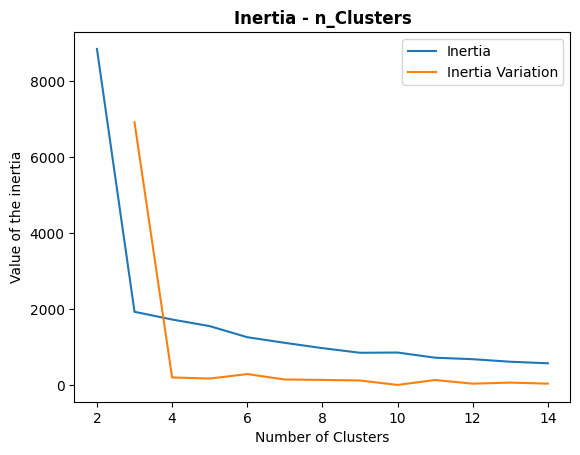

In [184]:



resG = []
nc = 15
for n in range(2, nc):
    km_X1 = KMeans(n_clusters=n, n_init='auto').fit(X1)
    resG.append([n, km_X1.inertia_])

resG = pl.DataFrame(resG, columns=['n_clusters', 'K-Inertia'])

resG = resG.with_columns([
    (pl.col('K-Inertia') - pl.col('K-Inertia').shift(1)).abs().alias('Inertia Variation')
    ])


# LETS Prepare a figure with the results 

figure, ax = plt.subplots()

sns.lineplot(x=resG['n_clusters'], y=resG['K-Inertia'], ax=ax, label = 'Inertia')
sns.lineplot(x=resG['n_clusters'], y=resG['Inertia Variation'], ax=ax, label= 'Inertia Variation')

plt.title('Inertia - n_Clusters', fontweight = 'bold')
plt.xlabel('Number of Clusters')
plt.ylabel('Value of the inertia')
plt.legend()

# plt.grid(linestyle = '--', linewidth = 0.25)

Here i sort the dataframe by the inertia and than justtake the first value of the first column which is the Number of clusters corresponding to the Maximum Inertia

In [185]:
resG.head(nc)

opt = resG.sort('Inertia Variation', descending= True)[0,0]

<AxesSubplot: >

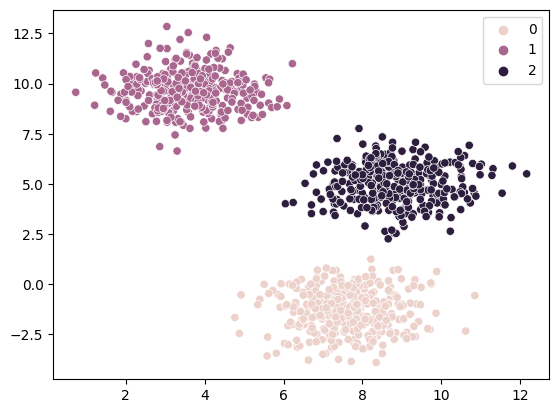

In [186]:
km_X1 = KMeans(n_clusters= opt, n_init='auto').fit(X1)
sns.scatterplot(x=X1[:,0], y=X1[:,1], hue = km_X1.labels_)

First we try without giving any numer of cluster

As we can se it detects just two clusters even thouh we clearly have 3

<AxesSubplot: >

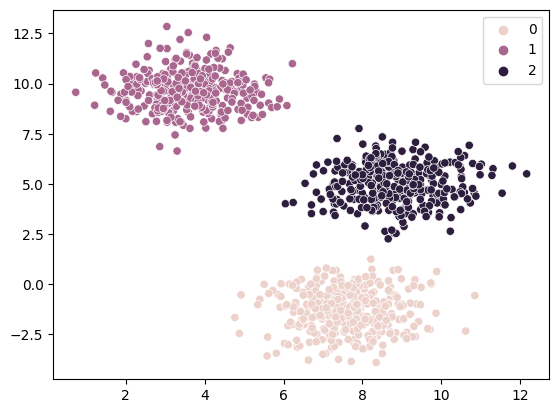

In [187]:
agg_X1 = AgglomerativeClustering(n_clusters= 3).fit(X1)
sns.scatterplot(x=X1[:,0], y=X1[:,1], hue = agg_X1.labels_)


DBSCAN perfroms good but it is really prone to ouliers and errors in the clustering if the correct distance or density is not set

<AxesSubplot: >

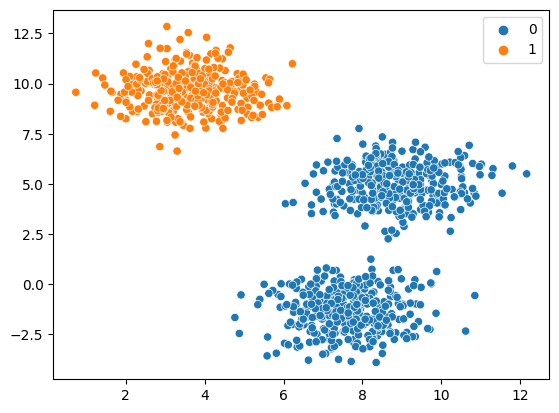

In [188]:
db_X1 = DBSCAN(1.5).fit(X1)
sns.scatterplot(x=X1[:,0], y=X1[:,1], hue = db_X1.labels_)

# MOONS

In [189]:
X2, y2 = make_moons(n_samples=1000, noise=.05, random_state=0)

<AxesSubplot: >

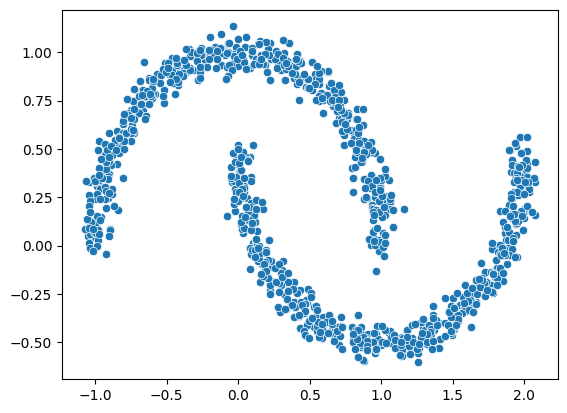

In [190]:
# let's plot the blobs to see how it will look like 

sns.scatterplot(x=X2[:,0], y=X2[:,1])

# it seems that two of the 3 generated clusters are quite close

# K-Means

Let's sort this using the Kmeans algorithm

C:\Users\jakub\AppData\Local\Temp\ipykernel_18304\2396617232.py:7: DeprecationWarning: `columns` is deprecated as an argument to `__init__`; use `schema` instead.
  resG = pl.DataFrame(resG, columns=['n_clusters', 'K-Inertia'])


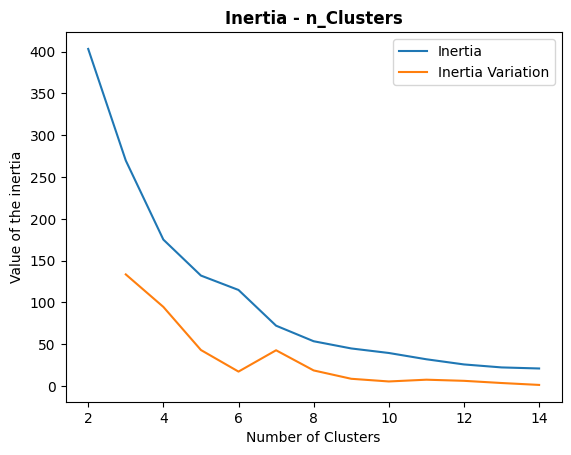

In [191]:
resG = []
nc = 15
for n in range(2, nc):
    km_X2 = KMeans(n_clusters=n, n_init='auto').fit(X2)
    resG.append([n, km_X2.inertia_])

resG = pl.DataFrame(resG, columns=['n_clusters', 'K-Inertia'])

resG = resG.with_columns([
    (pl.col('K-Inertia') - pl.col('K-Inertia').shift(1)).abs().alias('Inertia Variation')
    ])


# LETS Prepare a figure with the results 

figure, ax = plt.subplots()

sns.lineplot(x=resG['n_clusters'], y=resG['K-Inertia'], ax=ax, label = 'Inertia')
sns.lineplot(x=resG['n_clusters'], y=resG['Inertia Variation'], ax=ax, label= 'Inertia Variation')

plt.title('Inertia - n_Clusters', fontweight = 'bold')
plt.xlabel('Number of Clusters')
plt.ylabel('Value of the inertia')
plt.legend()

# plt.grid(linestyle = '--', linewidth = 0.25)

In [192]:
resG.head(nc)

n_clusters,K-Inertia,Inertia Variation
i64,f64,f64
2,403.195466,null
3,269.721148,133.474318
4,175.114875,94.606273
5,132.082516,43.032359
6,114.864392,17.218124
7,72.132942,42.73145
8,53.522757,18.610185
9,44.901427,8.621329
10,39.483033,5.418395


In [193]:
opt_X2 = resG.sort('Inertia Variation', descending= True)[0,0]
opt_X2

3

<AxesSubplot: >

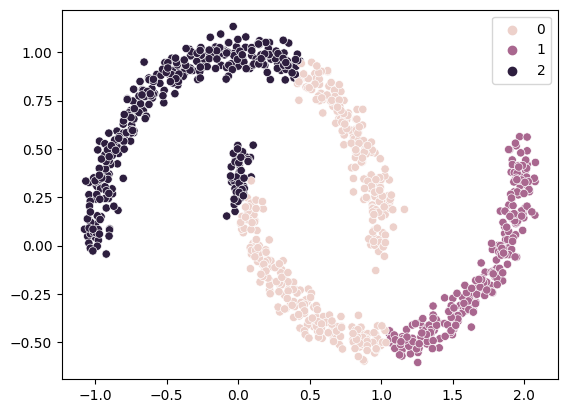

In [194]:
km_X2 = KMeans(n_clusters= opt, n_init='auto').fit(X2)
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue = km_X2.labels_)

# Agglomerative clustering

<AxesSubplot: >

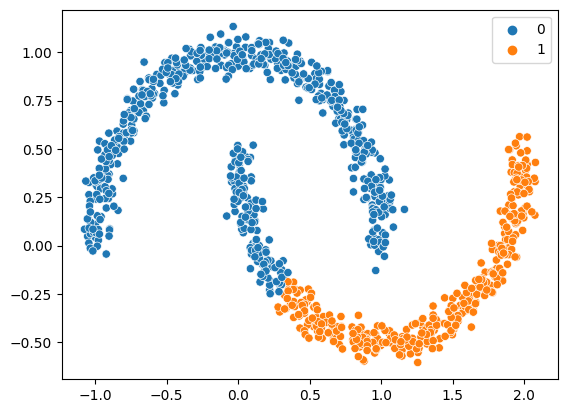

In [195]:
agg_X2 = AgglomerativeClustering(n_clusters= 2).fit(X2)
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue = agg_X2.labels_)

# DBSCAN CLustering

It is clear that this is teh best suited algorithm for this particular case

<AxesSubplot: >

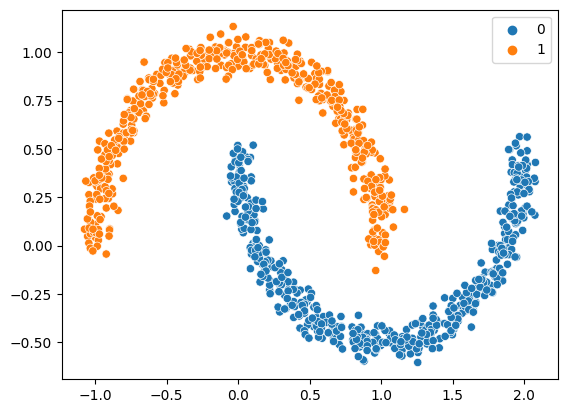

In [196]:
db_X2 = DBSCAN(0.15, min_samples=5).fit(X2)
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue = db_X2.labels_)

## Zadanie 2

* Uruchom kod poniżej. Sprawdź rozmiar zmiennej X.
* Przygotuj klastrowanie dla tips vs total_bill dla 5 klas z użyciem Kmeans.
* Uruchom kod klastrujący i narysuj sns.scatterplot() z hue=kmeans.labels_. Sprawdź wizualnie wynik z tego klastrowania z użyciem scatterplot.
* Przygotuj klastrowanie dla tips vs total_bill dla 3 grup, sprawdź z użyciem scatterplota grupy.
* Narusuj z użyciem scatter plota tips vs total_bill i nanieś kolor kolumna day na każdy punkt z użyciem ramki tips. Czy obrazek jest podobny do obrazka z punktu 4? Jak to możemy interpretować?
* Przygotuj klastrowanie dla tips vs total_bill z użyciem AgglomerativeClustering. Zinterpretuj wyniki wizualnie.

In [197]:
import polars as pl
import seaborn as sns

df = pl.read_csv(r'https://media.githubusercontent.com/media/jakub-braja/Podstawy-uczenia-maszynowego/main/DataSets/tips.csv',  separator= ',')

G = df[['tip', 'total_bill']].to_numpy()
H = df[['tip', 'total_bill','size']]
H.head()

tip,total_bill,size
f64,f64,i64
1.01,16.99,2
1.66,10.34,3
3.5,21.01,3
3.31,23.68,2
3.61,24.59,4


C:\Users\jakub\AppData\Local\Temp\ipykernel_18304\1650918352.py:7: DeprecationWarning: `columns` is deprecated as an argument to `__init__`; use `schema` instead.
  resG = pl.DataFrame(resG, columns=['n_clusters', 'K-Inertia'])


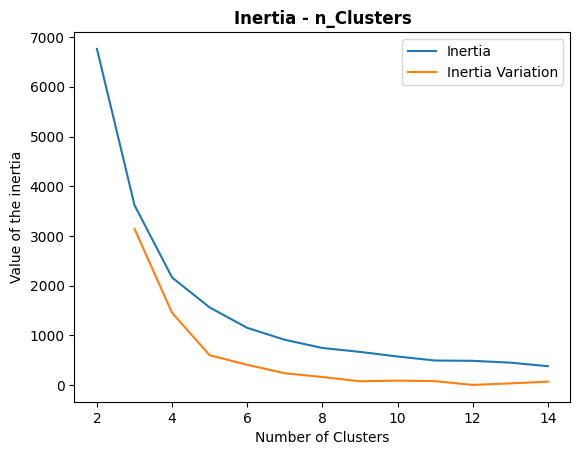

In [198]:
resG = []
nc = 15
for n in range(2, nc):
    km_G = KMeans(n_clusters=n, n_init='auto').fit(G)
    resG.append([n, km_G.inertia_])

resG = pl.DataFrame(resG, columns=['n_clusters', 'K-Inertia'])

resG = resG.with_columns([
    (pl.col('K-Inertia') - pl.col('K-Inertia').shift(1)).abs().alias('Inertia Variation')
    ])


# LETS Prepare a figure with the results 

figure, ax = plt.subplots()

sns.lineplot(x=resG['n_clusters'], y=resG['K-Inertia'], ax=ax, label = 'Inertia')
sns.lineplot(x=resG['n_clusters'], y=resG['Inertia Variation'], ax=ax, label= 'Inertia Variation')

plt.title('Inertia - n_Clusters', fontweight = 'bold')
plt.xlabel('Number of Clusters')
plt.ylabel('Value of the inertia')
plt.legend()

# plt.grid(linestyle = '--', linewidth = 0.25)

In [199]:
resG.head(nc)

n_clusters,K-Inertia,Inertia Variation
i64,f64,f64
2,6760.722297,null
3,3618.579542,3142.142756
4,2164.768008,1453.811534
5,1562.992931,601.775077
6,1153.040466,409.952465
7,913.037576,240.00289
8,748.304811,164.732765
9,669.791528,78.513284
10,577.233589,92.557939


In [200]:
opt_G = resG.sort('Inertia Variation', descending= True)[0,0]
opt_G

3

<AxesSubplot: >

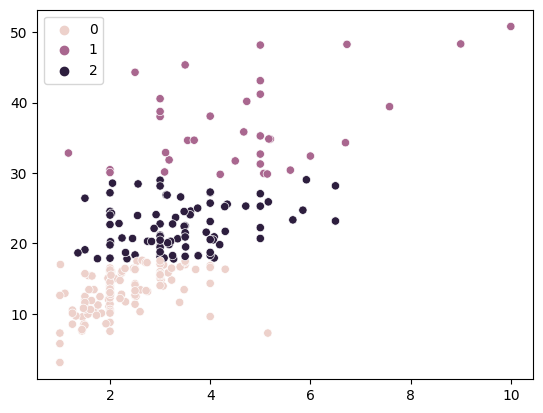

In [201]:
km_G = KMeans(n_clusters= opt, n_init='auto').fit(G)
sns.scatterplot(x=G[:,0], y=G[:,1], hue = km_G.labels_)

<AxesSubplot: >

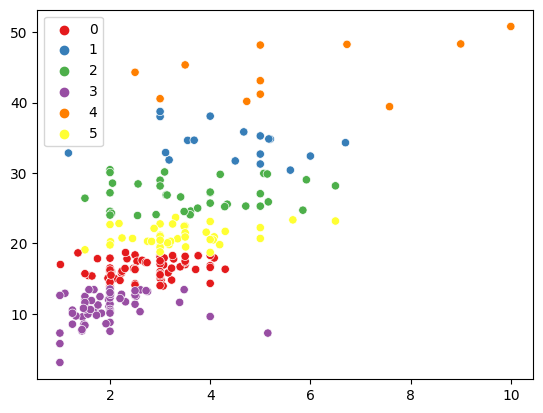

In [202]:
km_G = KMeans(n_clusters= 6, n_init='auto').fit(G)
sns.scatterplot(x=G[:,0], y=G[:,1], hue = km_G.labels_, palette="Set1")

In [203]:
H = H.filter(
    pl.col('size').is_in([4, 2, 3])
    )

H.head(50)


tip,total_bill,size
f64,f64,i64
1.01,16.99,2
1.66,10.34,3
3.5,21.01,3
3.31,23.68,2
3.61,24.59,4
4.71,25.29,4
2.0,8.77,2
3.12,26.88,4
1.96,15.04,2


In [204]:
selected = H.select(
    pl.col('size').is_in([4, 2, 3])
    )

print(selected)

shape: (231, 1)
┌──────┐
│ size │
│ ---  │
│ bool │
╞══════╡
│ true │
│ true │
│ true │
│ true │
│ …    │
│ true │
│ true │
│ true │
│ true │
└──────┘


In [205]:
resG['n_clusters'][resG["Inertia Variation"].arg_max()]

# resG.head(nc)

# opt = resG.sort('Inertia Variation', descending= True)[0,0]

3

<AxesSubplot: >

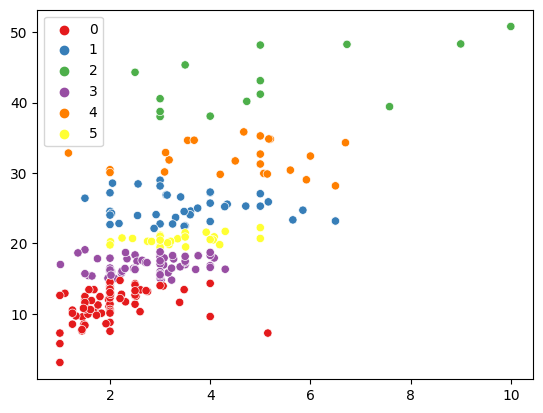

In [206]:
agg_G = AgglomerativeClustering(n_clusters= 6).fit(G)
sns.scatterplot(x=G[:,0], y=G[:,1], hue = agg_G.labels_, palette="Set1")

# Zadanie 3

* Policz odległość euklidesową pomiędzy 2 wektorami mnista zmienne x1 i x2.
* Uruchom algorytm klastrujący Kmeans dla X, sprawdź, jakie przypisano im grupy ustaw n_clusters=10 i n_clusters=5.
* Uruchom algorytm klastrujący AgglomerativeClustering dla X, sprawdź, jakie przypisano im grupy i ile jest grup.
* Sprawdź labels dla grup, wyciągnij indeksy i narysuj z użyciem plt.imshow() dane cyfry np. dla grupy 3. Sprawdź w ten sposób jak model dobrze radzi sobie z klastrowaniem mnista.

In [207]:
def len_v(vector):
    return np.sqrt(np.dot(vector,vector))

In [208]:
def dist_v(vector1, vector2):
    temp = vector1 - vector2
    return np.sqrt(np.dot(temp ,temp))

In [209]:
# We imported the mnist dataset
from numpy import genfromtxt

mnist_dataset = genfromtxt('https://media.githubusercontent.com/media/jakub-braja/Podstawy-uczenia-maszynowego/667a1ac9ba301124aca8a8b4f11bf4bc098ebcc4/MNIST/mnist_test.csv', delimiter=',')

# Instead of removing everytime the last element of the array i can directly remove the last column of the mnist_dataset
mnist_dataset = mnist_dataset[0:100][:,:-1]
print(len(mnist_dataset))


100


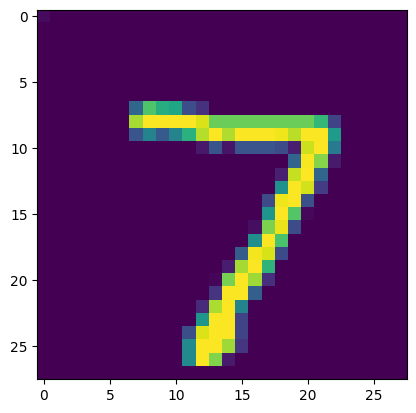

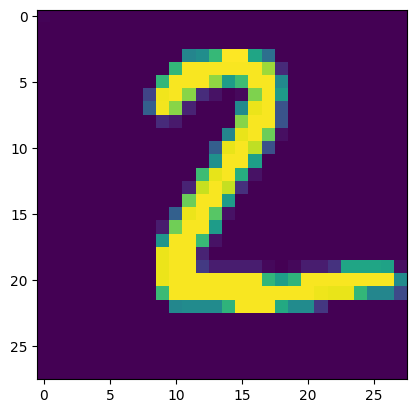

In [210]:
x0 = mnist_dataset[0]
x1 = mnist_dataset[1]

plt.imshow(x0.reshape(28,28), cmap=None)
plt.show()
plt.imshow(x1.reshape(28,28), cmap=None)



We computed the distance between the vectros

In [211]:
dist_v(x0, x1)

2873.552331174778